## Projet Numérique : câble sous-marin
*Sebastian PARTARRIEU & Emma BOU HANNA*


## Questions théoriques
1) On peut estimer l'espérance conditonelle de la variable aléatoire $L^*$ par la moyenne empirique de simulations conditionelles $L_k$ par la loi forte des grands nombres car les $L_k$ sont i.i.d  d'espérance finie donc $\frac{1}{k}\sum{L_k}$ converge en moyenne et presque sûrement vers $L^*$.

2) On pose $I = [1,N]\backslash J$ où $J = \lbrace j_1, ..., j_n \rbrace$. On cherche la loi conditionelle de la variable aléatoire $Z_{I}|Z(x_{j_{1}}) = z(x_{j_{1}}), ..., Z(x_{j_{n}}) = z(x_{j_{n}})$. 
On pose $X = (Z_{I}, Z_{J})$ et C sa matrice de covariance, fonction de $\sum$ (matrice de covariance du vecteur $Z$ - on a juste changé l'ordre des composantes). 
D'après le cours de Proba IV, la loi conditionelle cherchée est une loi gaussienne d'espérance $m_{Z_{I}|Z_{J}} = (\mu,...,\mu) - C_{Z_{I}, Z_{J}}C_{Z_{J}}^{-1}((z(x_{j_{1}}),..., z(x_{j_{n}})) - (\mu,...,\mu))$ et de matrice de covariance $CS_{Z_{I}}$ , qui est le complément de Schur du bloc $C_{Z_I}$ de la matrice C.

3) Le vecteur $Z = m + RY$ est un vecteur aléatoire gaussien car ses composantes sont des combinaisons linéaires de variables aléatoires gaussiennes. Il suffit donc de trouver son espérance et sa matrice de covariance pour caractériser entièrement sa loi. Par linéarité de l'espérance, l'espérance de Y étant nulle (donc celle de ses composantes), on a $E(Z) = m$. De plus, $\mathbb V(Z) = \mathbb V(RY) = R\mathbb V(Y) R^{T} = RR^T$ car on a $\mathbb V(Y) = I_N$.

4) On souhaite simuler la variable aléatoire $Z_I|Z_J = z_j$. On sait simuler un vecteur de composantes gaussiennes indépendantes suivant des lois $\mathcal N(0,1)$ (cela a été abordé en cours), on peut donc simuler $Y$. En sachant simuler $Y$, on souhaite retomber sur le vecteur gaussien $Z_I|Z_J$ décrit dans l'énoncé. Ainsi en reprennant la question précédente ainsi que ses notations, on calcule $R$ issue de la décomposition de Cholesky de $CS_{Z_{I}}$ (la matrice de covariance de la variable conditionelle, définie positive) ce qui veut dire que l'on retombe sur une variable aléatoire avec la matrice de covariance souhaitée. On fixera aussi $m = m_{Z_I|Z_J}$, ce qui nous donne un vecteur aléatoire gaussien d'espérance $m_{Z_I|Z_J}$ et de matrice de covariance $CS_{Z_{I}}$, autrement dit la variable aléatoire simulée sera bien $Z_I|Z_J$.

## Implémentation

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Discrétisation
A = 0
B = 500
N = 101
Delta = (B-A)/(N-1)
d_index = np.arange(N)
d = d_index*Delta

#Paramètres du modèle
mu = -5.
a = 50.
sigma2 = 12.

#Données

obs_index = np.array([0, 20, 40, 60, 80, 100])
depth = np.array([0, -4, -12.8, -1, -6.5, 0], float)

#Indice des composantes correspondant auc observations et aux composantes non observées

u_index = np.array(list(set(d_index) - set(obs_index)))


### Covariance

In [3]:
def cov(d, a, sigma2):
    '''
    La fonction prend en entrée un array ou un float.
    '''
    return sigma2*np.exp(-d/a)


### Matrice de distance

In [4]:
def distance(Delta, N):
    return np.array([[abs((i-j)*Delta) for i in range(N)] for j in range(N)])
    
dis = distance(Delta, N)

In [5]:
dis

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

### Covariance du vecteur $Z=(Z(x_0),..., Z(x_n))$

In [6]:
C = cov(dis, a, sigma2)
C

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

In [7]:
np.transpose(C) == C #on vérifie qu'elle est bien symétrique

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

### Matrices de covariance

On extrait la matrice de covariance entre les observations : 

In [8]:
cov_obs = C[np.ix_(obs_index, obs_index)]
cov_obs, np.shape(cov_obs)

(array([[1.20000000e+01, 1.62402340e+00, 2.19787667e-01, 2.97450261e-02,
         4.02555153e-03, 5.44799157e-04],
        [1.62402340e+00, 1.20000000e+01, 1.62402340e+00, 2.19787667e-01,
         2.97450261e-02, 4.02555153e-03],
        [2.19787667e-01, 1.62402340e+00, 1.20000000e+01, 1.62402340e+00,
         2.19787667e-01, 2.97450261e-02],
        [2.97450261e-02, 2.19787667e-01, 1.62402340e+00, 1.20000000e+01,
         1.62402340e+00, 2.19787667e-01],
        [4.02555153e-03, 2.97450261e-02, 2.19787667e-01, 1.62402340e+00,
         1.20000000e+01, 1.62402340e+00],
        [5.44799157e-04, 4.02555153e-03, 2.97450261e-02, 2.19787667e-01,
         1.62402340e+00, 1.20000000e+01]]), (6, 6))

On extrait la matrice de covariance entre les observations et les inconnues : 

In [9]:
cov_inc_obs = C[np.ix_(u_index, obs_index)]
cov_inc_obs, np.shape(cov_inc_obs)

(array([[1.08580490e+01, 1.79482343e+00, 2.42902937e-01, 3.28733378e-02,
         4.44892249e-03, 6.02096185e-04],
        [9.82476904e+00, 1.98358666e+00, 2.68449262e-01, 3.63306569e-02,
         4.91681975e-03, 6.65419193e-04],
        [8.88981865e+00, 2.19220229e+00, 2.96682318e-01, 4.01515855e-02,
         5.43392619e-03, 7.35401941e-04],
        [8.04384055e+00, 2.42275822e+00, 3.27884669e-01, 4.43743646e-02,
         6.00541720e-03, 8.12744838e-04],
        [7.27836792e+00, 2.67756192e+00, 3.62368601e-01, 4.90412573e-02,
         6.63701244e-03, 8.98221959e-04],
        [6.58573963e+00, 2.95916357e+00, 4.00479240e-01, 5.41989713e-02,
         7.33503313e-03, 9.92688787e-04],
        [5.95902365e+00, 3.27038152e+00, 4.42598009e-01, 5.98991269e-02,
         8.10646530e-03, 1.09709078e-03],
        [5.39194757e+00, 3.61433054e+00, 4.89146448e-01, 6.61987730e-02,
         8.95902970e-03, 1.21247282e-03],
        [4.87883592e+00, 3.99445300e+00, 5.40590429e-01, 7.31609588e-02,
       

On extrait la matrice de covariance entre les inconnues : 

In [10]:
cov_inc = C[np.ix_(u_index, u_index)]
cov_inc, np.shape(cov_inc)

(array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
         8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
        [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
         8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
        [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
         9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
        ...,
        [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
         1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
        [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
         1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
        [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
         9.82476904e+00, 1.08580490e+01, 1.20000000e+01]]), (95, 95))

### Espérance conditionelle

Reprenons la formule trouvée dans la première partie $m_{Z_{I}|Z_{J}} = \begin{pmatrix}mu\\...\\mu \end{pmatrix} - C_{Z_{I}, Z_{J}}C_{Z_{J}}^{-1}(\begin{pmatrix}z(x_{j_{1}})\\...\\ z(x_{j_{n}}) \end{pmatrix} - \begin{pmatrix}mu\\...\\mu \end{pmatrix})$.

In [22]:
p = N - len(depth)
M = np.dot(cov_inc_obs, np.linalg.inv(cov_obs))
X = np.subtract(mu*np.ones((len(depth), 1)), np.reshape(depth, (len(depth), 1)))
esp_cond = mu*np.ones((p,1)) - np.dot(M,X)

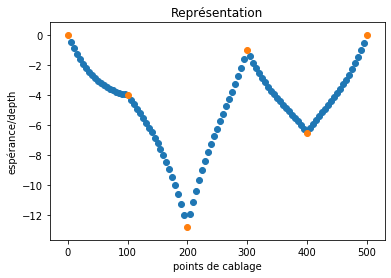

In [12]:
absc = A + Delta*u_index
plt.scatter(absc, esp_cond)
absc2 = A + Delta*obs_index
plt.scatter(absc2, depth)
plt.title("Représentation")
plt.xlabel("points de cablage")
plt.ylabel("espérance/depth")
plt.show()

### Variance conditionelle

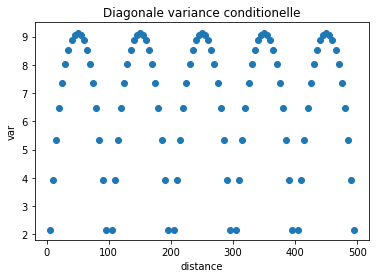

In [23]:
cov_obs_inc = C[np.ix_(obs_index, u_index)]
var_cond = cov_inc - np.dot(np.dot(cov_inc_obs, np.linalg.inv(cov_obs)), cov_obs_inc)
diag = [var_cond[i][i] for i in range(len(var_cond))]
plt.scatter(absc, diag)
plt.title("Diagonale variance conditionelle")
plt.xlabel("distance")
plt.ylabel("var")
plt.show()

On retrouve un graphique avec une courbe périodique, de période la distance entre les points connus (ceci car notre distance entre points connus est constante). Le résultat est cohérent, plus on s'éloigne du point connu, plus la variance conditionelle augmente (plus l'incertitude sur l'estimation du depth augmente). Les maximums sont ainsi équidistants des deux points connus les plus proches.

### Simulation conditionelle

Pour effectuer cette simulation, on reprend la partie précédente, il faut donc simuler un vecteur de composantes indépendantes gaussiennes centrées réduites puis calculer la décomposition de Cholesky de notre matrice $CS_{Z_I}$. On utilisera aussi l'espérance conditionnelle calculée précédemment.

On pourrait reprendre les éléments donnés dans le cours pour simuler un vecteur aléatoire gaussien en utilisant la simulation d'une variable aléatoire gaussienne centrée réduite à l'aide de deux variables aléatoires uniformes dans $]0,1[$. Néanmoins, on a choisi d'utiliser une implémentation existante de la librairie numpy pour alléger le notebook.

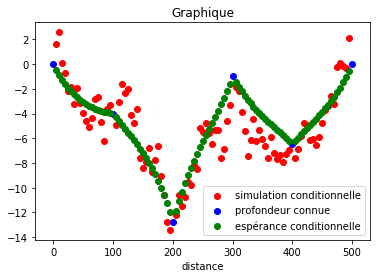

In [24]:
R = np.linalg.cholesky(var_cond)
Y = np.random.normal(0,1, size = len(var_cond))
Z_I = np.add(np.reshape(esp_cond, (1, len(esp_cond))), np.dot(R,Y))
Z_I
plt.scatter(absc, Z_I, c = 'r', label="simulation conditionnelle")
plt.scatter(absc2, depth, c = 'b', label="profondeur connue")
plt.scatter(absc, esp_cond, c = 'g', label="espérance conditionnelle")
plt.legend()
plt.title("Graphique")
plt.xlabel("distance")
plt.show()

A première vue, notre simulation conditionnelle est cohérente avec l'espérance conditionnelle calculée précédemment. De plus, l'écart entre notre simulation et l'espérance augmente lorsqu'on s'éloigne des points connus.

### Longueur du câble


In [25]:
def longueur(Z, delta, N):
    return sum([math.sqrt((delta**2+(Z[i]-Z[i-1])**2)) for i in range(1, N+1)])

Z = np.zeros(N+1)
Z[u_index] = Z_I
Z[obs_index] = depth
longueur(Z, Delta, N)

522.4337731352807

### Simulation de la longueur du câble

In [16]:
def simulation(k):
    somme = 0
    for _ in range(k):
        Y = np.random.normal(0,1, size = len(var_cond))
        Z_I = np.add(np.reshape(esp_cond, (1, len(esp_cond))), np.dot(R,Y))
        Z = np.zeros(N+1)
        Z[obs_index] = depth
        Z[u_index] = Z_I
        somme += longueur(Z, Delta, N)
    return somme/k

simulation(100)  # Calcul pour 100 simulations      

527.6221205660208

#### Comparaison avec la longueur de l'espérance conditionnelle

In [17]:
Z_2 = np.zeros(N+1)
Z_2[u_index] = np.reshape(esp_cond, (1, len(esp_cond)))
Z_2[obs_index] = depth
longueur(Z_2, Delta, N)

506.6468416918411

In [28]:
comparaison = abs(longueur(Z_2, Delta, N) - simulation(100))
comparaison

20.682722713259352

On se rend compte que la longueur estimée du câble est de l'ordre de la longueur de l'espérance conditionnelle + 20. La longueur de l'espérance conditionnelle est un mauvais indicateur de la longueur de câble nécessaire pour relier A et B.

#### Moyenne de longueur de câble

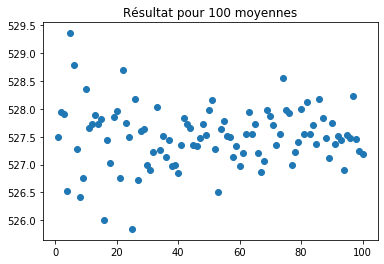

In [43]:
def repr(n):
    plt.scatter(np.arange(1,n+1), np.array([simulation(k) for k in range(1,n+1)]))
    plt.title(f"Résultat pour {n} moyennes")
    plt.show()

repr(100)

On remarque que $M_n$ est comprise entre 525 et 530m pour 100 simulations.

#### Histogramme des longueurs générées

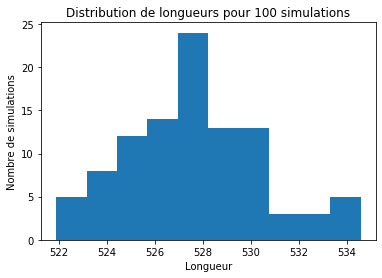

In [196]:
def longueur_2(k):
    tab = np.zeros(k)
    for i in range(k):
        """On génère notre distribution d'alttitude à chaque entrée dan la boucle """
        Y = np.random.normal(0,1, size = len(var_cond))
        Z_I = np.add(np.reshape(esp_cond, (1, len(esp_cond))), np.dot(R,Y))
        Z = np.zeros(N+1)
        Z[u_index] = Z_I
        Z[obs_index] = depth
        tab[i] = longueur(Z, Delta, N) # On ajoute la longueur de notre câble dans une liste à chaque simulation
    return(tab)

plt.hist(longueur_2(100))
plt.title("Distribution de longueurs pour 100 simulations")
plt.xlabel("Longueur")
plt.ylabel("Nombre de simulations")
plt.show()

### Détermination des intervalles de confiance par deux méthodes

#### Première méthode : On utilise le module stats de scipy pour pouvoir déterminer notre intervalle de confiance. 

Dans le premier cas, on utilise comme moyenne la moyenne des longueurs stockées dans un array, qui correspond à nos 100 simulations. Notre écart-type correspond à celui fourni par les fonctions du module numpy.



In [86]:
from scipy import stats

In [165]:
l = longueur_2(100)
conf_int_1 = stats.norm.interval(0.95, loc = np.mean(l), scale = np.std(l))
print(f"Première méthode : {conf_int_1}")

Première méthode : (521.155636754891, 533.291237022157)


##### Vérification de l'intervalle de confiance (première méthode)

In [166]:
verif = np.zeros(len(l))
for i in range(len(l)):
    verif[i] = (conf_int_1[0] <= l[i] <= conf_int_1[1])
sum(verif)/len(verif)

0.96

On retombe bien sur un intervalle qui concentre environ 95% des valeurs

##### Représentation statistique de la distribution de valeurs

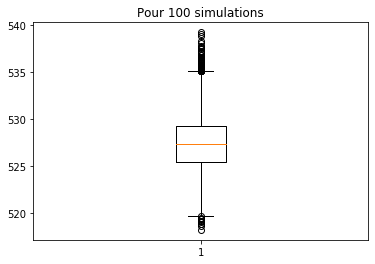

In [199]:
plt.boxplot(l)
plt.title("Pour 100 simulations")
plt.show()

#### Deuxième méthode : Codage à la main

On reprend notre tableau l qui contient les longueurs simulées, on trie le tableau par valeurs croissantes et on centre notre intervalle de confiance sur la médiane cette fois.

In [132]:
conf = np.sort(l)
# la médiane correspond au terme d'indice 49 dans conf (car elle est triée)
conf_int_2 = (conf[2], conf[96]) 
# On prend le terme d'indice 49 - 47 pour la borne inf et 49 + 48 pour la borne sup
print(f"Deuxième méthode : {conf_int_2}")

Deuxième méthode : (522.4632716113448, 532.3608023649894)


### Probabilité que la longueur du câble dépasse 525m

On reprend nos 100 simulations et à chaque simulation, on regarde si la longueur dépasse 525. Pour cela, on utilise un masque de booléen sur notre tableau de longueurs issues des 100 simulations, et on somme les booléens (True = 1 et False = 0), puis on divise par le nombre de simulations.

In [97]:
def depasse(k, valeur):
    tab = longueur_2(k)
        
    return(sum(tab >= valeur)/k)

depasse(100, 255)

1.0

"La longueur du câble dépasse 525m" est un évênement presque sûr pour 100 simulations.

## Avec 1000 simulations

527.3241353202711


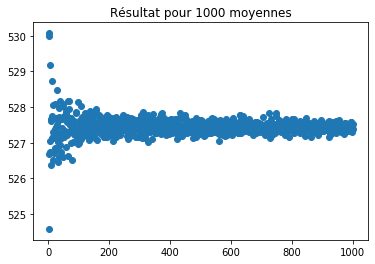

In [44]:
# Une simulation
print(simulation(1000))
# Représentation des longueurs pour 1000 simulations
repr(1000)


On remarque bien une concentration des simulations autour d'une valeur fixe. 


### Intervalle de confiance

On reprend cette fois-ci uniquement la première méthode, plus fiable car on a utilisé un module conçu exprès pour les statistiques.

In [176]:
l_1000 = np.array(longueur_2(1000))
conf_int_1 = stats.norm.interval(0.95, loc = np.mean(l_1000), scale = np.std(l_1000))

print(f"Première méthode : {conf_int_1}")


Première méthode : (521.6578825884974, 533.1095832794508)


##### Vérification de l'intervalle de confiance

In [182]:
verif = np.zeros(len(l_1000))
for i in range(len(l_1000)):
    verif[i] = (conf_int_1[0] <= l_1000[i] <= conf_int_1[1])
sum(verif)/len(verif)

0.95

##### Représentation statistique de la distribution de valeurs

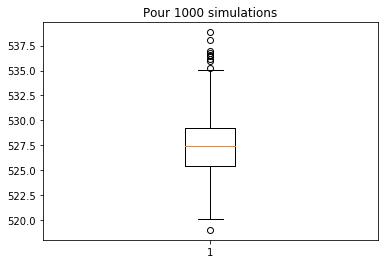

In [200]:
plt.boxplot(l_1000)
plt.title("Pour 1000 simulations")
plt.show()

### Probabilité de dépasser 525m pour la longueur du câble

In [141]:
depasse(1000, 525)

0.806

On remarque que cet évênement n'est plus presque sûr pour 1000 simulations, en effet certaines valeurs sont en dessous de 525m...

## Avec 10000 simulations

In [56]:
simulation(10000)

527.4228283634556

In [179]:
l_10000 = np.array(longueur_2(10000))
conf_int_1 = stats.norm.interval(0.95, loc = np.mean(l_10000), scale = np.std(l_10000))
print(f"Première méthode : {conf_int_1}")


Première méthode : (521.7713630486406, 533.1970568574146)


##### Vérification de l'intervalle de confiance

In [183]:
verif = np.zeros(len(l_10000))
for i in range(len(l_10000)):
    verif[i] = (conf_int_1[0] <= l_10000[i] <= conf_int_1[1])
sum(verif)/len(verif)

0.9512

##### Représentation statistique de la distribution de valeurs

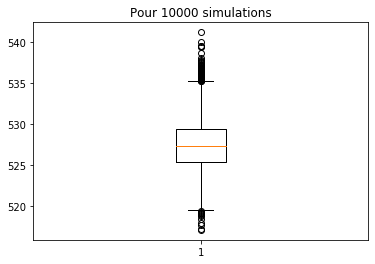

In [201]:
plt.boxplot(l_10000)
plt.title("Pour 10000 simulations")
plt.show()

In [185]:
depasse(10000, 525)

0.799

## Avec 100000 simulations

In [202]:
simulation(100000)

527.4457653113534

In [204]:
l_100000 = np.array(longueur_2(100000))
conf_int_1 = stats.norm.interval(0.95, loc = np.mean(l_100000), scale = np.std(l_100000))
print(f"Première méthode : {conf_int_1}")


Première méthode : (521.7556797261889, 533.109809058385)


##### Vérification de l'intervalle de confiance

In [205]:
verif = np.zeros(len(l_100000))
for i in range(len(l_100000)):
    verif[i] = (conf_int_1[0] <= l_100000[i] <= conf_int_1[1])
sum(verif)/len(verif)

0.95164

##### Représentation statistique de la distribution de valeurs

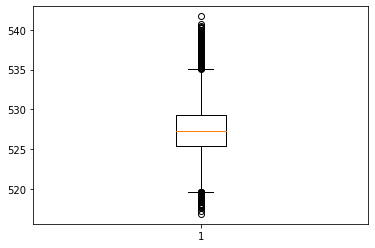

In [206]:
plt.boxplot(l_100000)
plt.show()

In [207]:
depasse(100000, 525)

0.79505

On a plus de chances d'avoir des valeurs en dessous de 525 quand on augmente le nombre de simulations.

#### Superposition des distributions pour 100, 1000, 10000, 100000

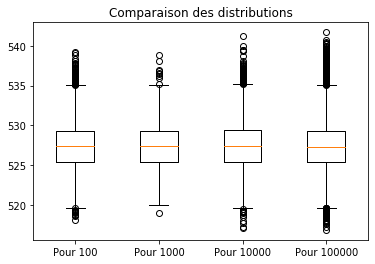

In [208]:
fig, ax = plt.subplots()
data = [l, l_1000, l_10000, l_100000]
ax.boxplot(data)
ax.set_xticklabels(np.array(['Pour 100', 'Pour 1000', 'Pour 10000', 'Pour 100000']))
plt.title("Comparaison des distributions")
plt.show()

**Fin du Projet**